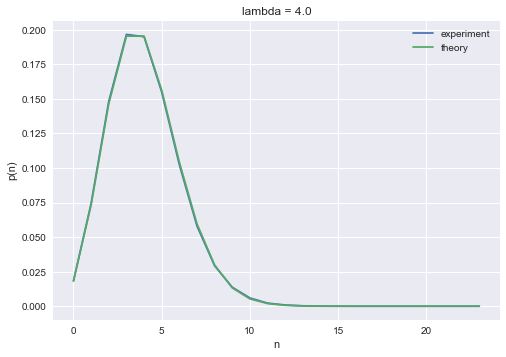

In [11]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 

# going to sample from poisson

lambda1 = 4.0
MAX_ITERATION  = 100000
r = 0.8

# 'large enough' value for poisson
# unlikely to go beyond 6 lambda for poisson
# in general, wouldn't make histogram on the fly 
MAX_COUNTER = int(6*lambda1)
n_start = 10

# allocate memory up front, avoid .append in middle
list_poisson = [None]*MAX_ITERATION
counter = [0]*MAX_COUNTER
counter_x = range(MAX_COUNTER)
counter_poisson = [0]*MAX_COUNTER
n = n_start

# let's do some math!
for i in range(MAX_ITERATION):
    u1 = np.random.random() # get number betwen 0-1
    if (u1>0.5):
        n_trial = n+1
    else:
        n_trial = n-1 
        
    if (n_trial<0):
        #print(n)
        list_poisson[i] = n 
        counter[n] = counter[n]+1
        continue # goes to next iteration, IMPORTANT, low lambda, could go negative regime, so need this check
    
    P_trial = (math.exp(-lambda1)*(lambda1**n_trial))/(float(math.factorial(n_trial))) # probably should write a function
    P_current = (math.exp(-lambda1)*(lambda1**n))/(float(math.factorial(n)))
    
    if (P_trial > P_current):
        n = n_trial
        #print(n)
        list_poisson[i] = n
        counter[n] = counter[n]+1
    else:
        r = np.random.random()
        if (P_trial/P_current > r): # less than one, but bigger than r, go with move 
            n = n_trial
            #print(n)
            list_poisson[i] = n
            counter[n] = counter[n] + 1 
        else: 
            #print(n)
            list_poisson[i] = n
            counter[n] = counter[n] + 1 
            
# out of big for i loop
for n in range(MAX_COUNTER): # time to normalize 
    counter[n] = counter[n]/float(MAX_ITERATION) # remember that FLOAT! 

for n in range(MAX_COUNTER): # this is theory, how much you should have in nth bin 
    counter_poisson[n] = (math.exp(-lambda1)*(lambda1**n))/(float(math.factorial(n)))

# time to plot it! 
experiment = plt.plot(counter_x,counter,label='experiment')
theory = plt.plot(counter_x,counter_poisson,label='theory')
plt.xlabel("n")
plt.ylabel("p(n)")
plt.title("lambda = {}".format(lambda1))
plt.legend()
plt.show()